In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
samps = np.load('./../output/processed_emcee_samples_plPeak_r00.npy')

mu0s = samps[:,-4]
logsig0s = samps[:,-3]
alphas = samps[:,-2]
betas = samps[:,-1]

In [4]:
qs = np.linspace(0,1,10)

lines_low = np.zeros((mu0s.size,qs.size))
lines_high = np.zeros((mu0s.size,qs.size))
for i in range(mu0s.size):
    
    mean = mu0s[i] + alphas[i]*(qs-0.5)
    sig = 10.**(logsig0s[i] + betas[i]*(qs-0.5))
    
    lines_low[i,:] = mean-sig
    lines_high[i,:] = mean+sig

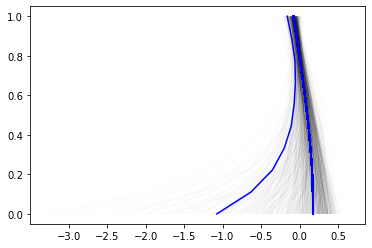

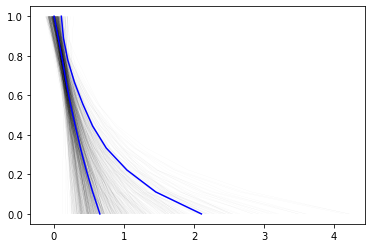

In [11]:
fig,ax = plt.subplots()
for i in range(mu0s.size):
    ax.plot(lines_low[i,:],qs,color='black',alpha=0.1,lw=0.1)
    ax.plot(np.quantile(lines_low,0.5,axis=0),qs,color='blue')
ax.plot(np.quantile(lines_low,0.05,axis=0),qs,color='blue')
    
fig,ax = plt.subplots()
for i in range(mu0s.size):
    ax.plot(lines_high[i,:],qs,color='black',alpha=0.1,lw=0.1)
ax.plot(np.quantile(lines_high,0.5,axis=0),qs,color='blue')
ax.plot(np.quantile(lines_high,0.95,axis=0),qs,color='blue')